In [17]:
!pip install opendatasets -q

In [18]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/quora/question-pairs-dataset")

Skipping, found downloaded files in "./question-pairs-dataset" (use force=True to force download)


In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv("/content/question-pairs-dataset/questions.csv")

In [21]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
325660,325660,638772,638773,What is the Eckankar cult?,How dangerous is the Eckankar cult?,0
139852,139852,276841,276842,Special talents to become famous?,Mother teach her daughter be a lady?,0
215661,215661,425248,425249,How do I find IP address of someone who attemp...,Is there any way to get the IP address of a fa...,0
13168,13168,26289,26290,How do I find someone's new Gmail account?,How do I find someone's Gmail account?,1
38784,38784,77265,77266,Why do Asian parents believe that being a doct...,What happens if you're Asian and your parents ...,0


In [22]:
df.shape

(404351, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [24]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [25]:
df = df.dropna()

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255042
1,149306


In [28]:
df_duplicate_0=df[df["is_duplicate"]==0].sample(30000,random_state=2)
df_duplicate_1=df[df["is_duplicate"]==1].sample(30000,random_state=2)

In [29]:
df=pd.concat([df_duplicate_0,df_duplicate_1],axis=0)

In [30]:
df = df.sample(frac=1, random_state=42)

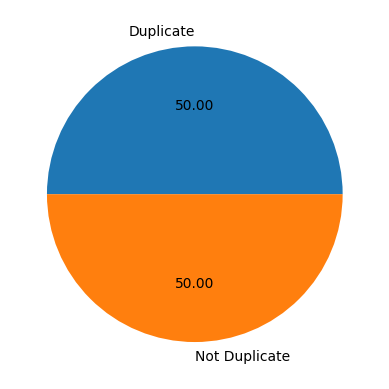

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['is_duplicate'].value_counts(),labels=["Duplicate","Not Duplicate"],autopct="%0.2f")
plt.show()

In [32]:
df.shape

(60000, 6)

In [33]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
len(qid)

120000

In [34]:
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 119403
Number of questions getting repeated 504


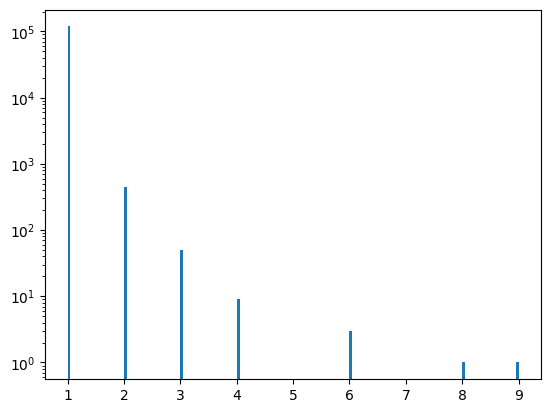

In [35]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [36]:
len(("What is the step by step guide to invest in share market in india?").split())

14

In [37]:
df['q1_char_count']=df['question1'].apply(lambda x: len(str(x)))
df['q2_char_count']=df['question2'].apply(lambda x: len(str(x)))

In [38]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51


In [39]:
df['q1_word_count']=df['question1'].apply(lambda x: len(str(x).split()))
df['q2_word_count']=df['question2'].apply(lambda x: len(str(x).split()))

In [40]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51,7,8


In [41]:
A=set(list(map(lambda x: x.lower().strip(),"What is the step by step guide to invest in share market in india?".split())))
B=set(list(map(lambda x: x.lower().strip(),"What is the".split())))
len(A & B)

3

In [42]:
def common_words(row):
  x=set(list(map(lambda x: x.lower().strip(),str(row['question1']).split())))
  y=set(list(map(lambda x: x.lower().strip(),str(row['question2']).split())))
  return len(x & y)

In [43]:
df["common_words"]=df.apply(common_words,axis=1)

In [44]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51,7,8,5


In [45]:
def total_words(row):
  x=set(list(map(lambda x: x.lower().strip(),str(row['question1']).split())))
  y=set(list(map(lambda x: x.lower().strip(),str(row['question2']).split())))
  return len(x)+len(y)

In [46]:
df["total_words"]=df.apply(total_words,axis=1)

In [47]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words,total_words
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51,7,8,5,15
353055,353055,691545,691546,How do I find the number of factors (which are...,How do I find the number of factors (natural n...,1,90,80,17,15,13,29
151782,151782,300237,300238,What is the quickest way to gain money online?,What's the quickest way to earn money online?,1,46,45,9,8,6,17
146822,146822,290511,290512,How a girl can impress a mature boy?,How does a girl impress a boy?,0,36,30,8,7,5,13
252413,252413,496919,496920,What is the best way to promote a party?,How should you promote?,0,40,23,9,4,0,13


In [48]:
df["words_shared"]=df['common_words']/df['total_words']

In [49]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words,total_words,words_shared
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51,7,8,5,15,0.333333


In [50]:
import seaborn as sns

Minimum Characters:  1
Maximum Characters:  623
Average Characters:  58.132083333333334


<Figure size 1000x1500 with 0 Axes>

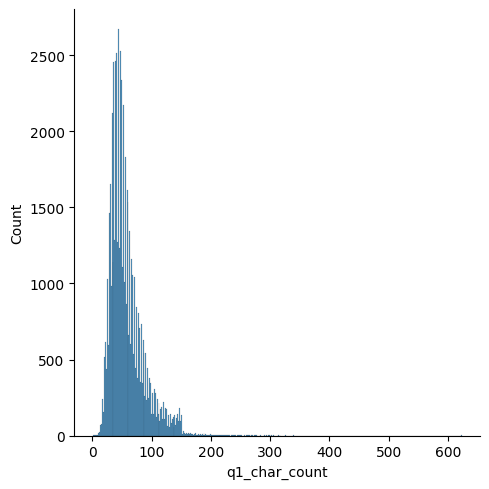

In [51]:
print("Minimum Characters: ",df['q1_char_count'].min())
print("Maximum Characters: ",df['q1_char_count'].max())
print("Average Characters: ",df['q1_char_count'].mean())
plt.figure(figsize=(10,15))
sns.displot(df['q1_char_count'])
plt.show()



Minimum Characters:  1
Maximum Characters:  1151
Average Characters:  58.58358333333333


<Figure size 1000x1500 with 0 Axes>

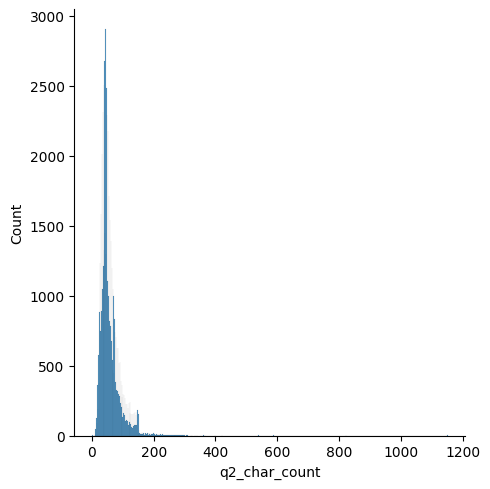

In [52]:
print("Minimum Characters: ",df['q2_char_count'].min())
print("Maximum Characters: ",df['q2_char_count'].max())
print("Average Characters: ",df['q2_char_count'].mean())
plt.figure(figsize=(10,15))
sns.displot(df['q2_char_count'])
plt.show()



Minimum Words:  1
Maximum Words:  125
Average Words:  10.71505


<Figure size 1000x1500 with 0 Axes>

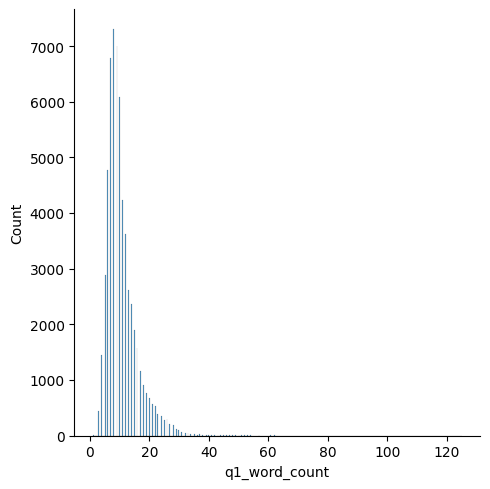

In [ ]:
print("Minimum Words: ",df['q1_word_count'].min())
print("Maximum Words: ",df['q1_word_count'].max())
print("Average Words: ",df['q1_word_count'].mean())
plt.figure(figsize=(10,15))
sns.displot(df['q1_word_count'])
plt.show()

Minimum Words:  1
Maximum Words:  237
Average Words:  10.902766666666666


<Figure size 1000x1500 with 0 Axes>

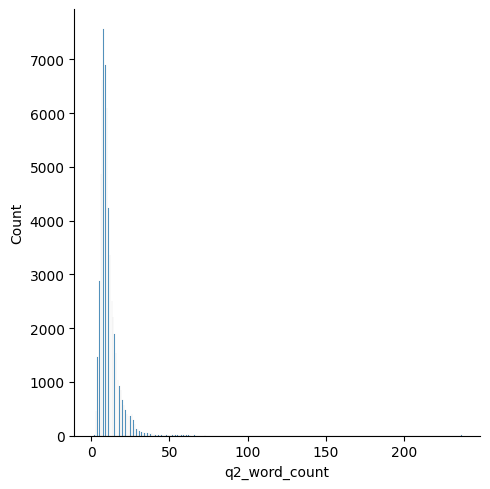

In [54]:
print("Minimum Words: ",df['q2_word_count'].min())
print("Maximum Words: ",df['q2_word_count'].max())
print("Average Words: ",df['q2_word_count'].mean())
plt.figure(figsize=(10,15))
sns.displot(df['q2_word_count'])
plt.show()



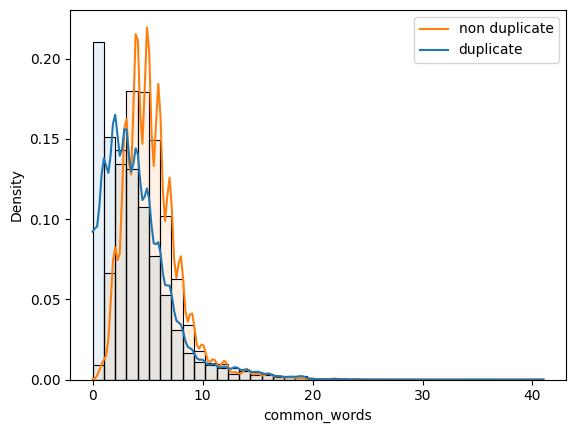

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for both classes
sns.histplot(
    data=df,
    x="common_words",
    hue="is_duplicate",
    kde=True,
    stat="density",      # normalize like distplot
    common_norm=False,   # separate normalization per group
    bins=40,             # adjust bins for smoothness
    alpha=0.1, # transparency like your image
)

plt.legend(labels=["non duplicate", "duplicate"])
plt.show()


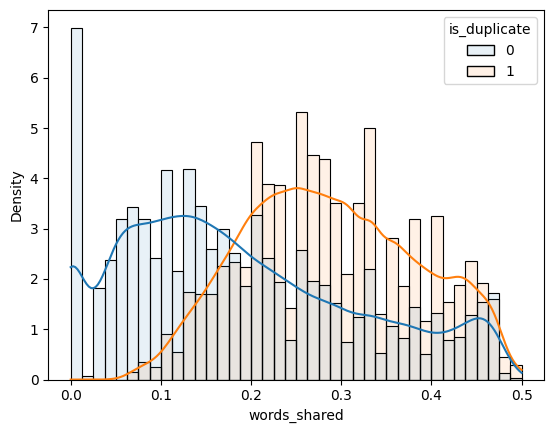

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for both classes
sns.histplot(
    data=df,
    x="words_shared",
    hue="is_duplicate",
    kde=True,
    stat="density",
    common_norm=False,   # separate normalization per group
    bins=40,             # adjust bins for smoothness
    alpha=0.1, # transparency like your image
)


plt.show()


In [57]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['is_duplicate','q1_char_count','q2_char_count','q1_word_count','q2_word_count','common_words','total_words','words_shared']])
y = df['is_duplicate'].values


In [58]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,      # Reduce to 2D space
    init='random',       # Initial embedding (random / pca)
    random_state=101,    # For reproducibility
    method='barnes_hut', # Approximation method (fast for large n)
    n_iter=1000,         # Number of iterations for optimization
    verbose=2,           # Print progress
    angle=0.5            # Tradeoff between speed & accuracy (lower = slower, more accurate)
).fit_transform(X)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.057s...
[t-SNE] Computed neighbors for 60000 samples in 1.921s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sam

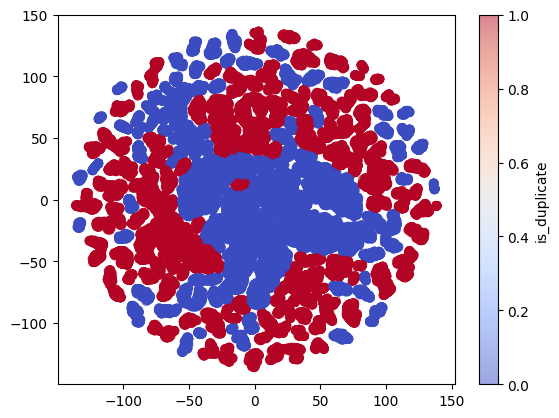

In [59]:
import matplotlib.pyplot as plt

plt.scatter(tsne2d[:,0], tsne2d[:,1], c=y, cmap='coolwarm', alpha=0.5)
plt.colorbar(label="is_duplicate")
plt.show()


In [60]:
ques_df=df[['question1','question2']]

In [61]:
ques_df.head()

,question1,question2
137510,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...
353055,How do I find the number of factors (which are...,How do I find the number of factors (natural n...
151782,What is the quickest way to gain money online?,What's the quickest way to earn money online?
146822,How a girl can impress a mature boy?,How does a girl impress a boy?
252413,What is the best way to promote a party?,How should you promote?


In [62]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words,total_words,words_shared
137510,137510,272251,272252,What are some examples of vertebrate carnivores?,What are some examples of carnivores and omniv...,0,48,51,7,8,5,15,0.333333


In [63]:
df=df.drop(columns=['id','qid1','qid2','question1','question2'])

In [64]:
df.head(1)

,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words,total_words,words_shared
137510,0,48,51,7,8,5,15,0.333333


In [65]:
questions = list(ques_df['question1'].astype(str)) + list(ques_df['question2'].astype(str))

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer(max_features=6000)


In [67]:
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [68]:
print(q1_arr.shape)
print(q2_arr.shape)

(60000, 6000)
(60000, 6000)


In [69]:
tempq1=pd.DataFrame(q1_arr,index=df.index)
tempq2=pd.DataFrame(q2_arr,index=df.index)

In [70]:
temp_df=pd.concat([tempq1,tempq2],axis=1)

In [71]:
df=pd.concat([df,temp_df],axis=1)

In [72]:
df.head(1)

,is_duplicate,q1_char_count,q2_char_count,q1_word_count,q2_word_count,common_words,total_words,words_shared,0,1,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
137510,0,48,51,7,8,5,15,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df.iloc[:,1:].values

array([[ 48.,  51.,   7., ...,   0.,   0.,   0.],
       [ 90.,  80.,  17., ...,   0.,   0.,   0.],
       [ 46.,  45.,   9., ...,   0.,   0.,   0.],
       ...,
       [ 34., 100.,   7., ...,   0.,   0.,   0.],
       [ 60.,  43.,  10., ...,   0.,   0.,   0.],
       [ 40.,  44.,   6., ...,   0.,   0.,   0.]])

In [74]:
df.iloc[:,0].values

array([0, 1, 1, ..., 0, 0, 1])

In [75]:
df.shape

(60000, 12008)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:].values,df.iloc[:,0].values,test_size=0.2,random_state=2)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
mnb_pred=model.predict(X_test)
print(accuracy_score(y_test,mnb_pred))
print(confusion_matrix(y_test,mnb_pred))
print(precision_score(y_test,mnb_pred))

0.7556666666666667
[[4355 1630]
 [1302 4713]]
0.7430238057701403


In [79]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_pred=bnb.predict(X_test)
print(accuracy_score(y_test,bnb_pred))
print(confusion_matrix(y_test,bnb_pred))
print(precision_score(y_test,bnb_pred))

0.7058333333333333
[[4180 1805]
 [1725 4290]]
0.7038556193601313


In [80]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print(accuracy_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))
print(precision_score(y_test,gnb_pred))

0.6529166666666667
[[3206 2779]
 [1386 4629]]
0.624865010799136


# **Best Model For Now**

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))

0.7818333333333334
[[4238 1747]
 [ 871 5144]]
0.7464809171382963


In [83]:
!pip install xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 1.5 MB/s eta 0:00:00


In [84]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(precision_score(y_test,xgb_pred))

0.77625
[[4060 1925]
 [ 760 5255]]
0.7318941504178273


In [86]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('mnb',model),('rfc',rfc),('xgb',xgb)],voting='soft')
vc.fit(X_train,y_train)
vc_pred=vc.predict(X_test)
print(accuracy_score(y_test,vc_pred))
print(confusion_matrix(y_test,vc_pred))
print(precision_score(y_test,vc_pred))

0.7895833333333333
[[4312 1673]
 [ 852 5163]]
0.755266237565828


In [87]:
import pickle
pickle.dump(vc,open('model.pkl','wb'))
pickle.dump(cv,open('vectorizor.pkl','wb'))

In [88]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>